# "Predicción de la diferencia de goles y análisis de la ventaja de localía en partidos internacionales de fútbol"
Ciencia de Datos

Profesor: JESUS ANTONIO VILLARRAGA PALOMINO

Integrantes:

Karol Andrea Daza Rojas

Cristian Camilo Berbeo Villalobos

Daniel Felipe Fonseca Cabezas

# "Resumen"
Este cuadernillo documenta el análisis exploratorio, la limpieza y la preparación de datos, la ingeniería de variables, la construcción y evaluación de un modelo de regresión para predecir la diferencia de goles (goal_diff = home_score - away_score) y el análisis de la ventaja de localía usando la base de datos International Football Results (1872–2023) (archivo results.csv). Se incluyen las decisiones de modelado, gráficos y conclusiones.

## "Descripción de la base de datos"
Nombre del archivo: results.csv

Fuente: Conjunto público clásico que registra resultados internacionales desde 1872 hasta 2023 (Kaggle). 

El archivo previsto contiene registros de partidos con las siguientes columnas principales:

### Datos  y Descripcion

|date:        Fecha del partido (YYYY-MM-DD)|

|  home_team: Equipo local                 |

|  away_team: Equipo visitante               |

| home_score: Goles del equipo local            |

| away_score: Goles del equipo visitante          |

| tournament: Tipo de competencia (Friendly, World Cup, etc.)|

|    city: Ciudad donde se jugó             |

|   country: País donde se jugó              |

|   neutral: Booleano que indica si fue en cancha neutral  |


- El dataset es amplio y abarca más de 48.000 partidos.

- Algunas inconsistencias posibles: variaciones en el nombre de torneos, nombres de equipos, y fechas antiguas. Se realizará limpieza y normalización.

## Objetivo General
evaluar un modelo de regresión que prediga la diferencia de goles (goal_diff) en partidos internacionales y cuantifique el efecto de la localía.
### Objetivos Especificos
1. Generar variables derivadas (ingeniería de features) relevantes para la predicción.
2. Entrenar un modelo de regresión (lineal y comparativo con otros) y evaluar su desempeño.
3. Analizar residuales y extraer conclusiones deportivas y estadísticas.

### Estructura de la Base de Datos

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


DATA_PATH = '../data/results.csv'


df = pd.read_csv(DATA_PATH)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.dropna(subset=['date']).sort_values('date').reset_index(drop=True)


print('Dimensiones:', df.shape)
print(df.columns.tolist())


# Mostrar primeras filas
print(df.head())


Dimensiones: (48673, 9)
['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']
        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  


### Informacion de la Base de Datos

In [2]:
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
df.info()

=== INFORMACIÓN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48673 non-null  datetime64[ns]
 1   home_team   48673 non-null  object        
 2   away_team   48673 non-null  object        
 3   home_score  48673 non-null  int64         
 4   away_score  48673 non-null  int64         
 5   tournament  48673 non-null  object        
 6   city        48673 non-null  object        
 7   country     48673 non-null  object        
 8   neutral     48673 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB


### Resumen Estadistico

In [3]:
print("=== RESUMEN ESTADÍSTICO ===")
df.describe(include='all')
print(df.describe(include='all'))

=== RESUMEN ESTADÍSTICO ===
                                 date home_team away_team    home_score  \
count                           48673     48673     48673  48673.000000   
unique                            NaN       325       318           NaN   
top                               NaN    Brazil   Uruguay           NaN   
freq                              NaN       608       579           NaN   
mean    1993-11-20 00:23:08.137160192       NaN       NaN      1.757874   
min               1872-11-30 00:00:00       NaN       NaN      0.000000   
25%               1980-03-22 00:00:00       NaN       NaN      1.000000   
50%               2000-04-02 00:00:00       NaN       NaN      1.000000   
75%               2012-12-03 00:00:00       NaN       NaN      2.000000   
max               2025-10-14 00:00:00       NaN       NaN     31.000000   
std                               NaN       NaN       NaN      1.772685   

          away_score tournament          city        country neutral  


### Valores nulos

In [4]:
print("=== VALORES NULOS POR COLUMNA ===")
df.isnull().sum()

=== VALORES NULOS POR COLUMNA ===


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

### Distribucion de los goles

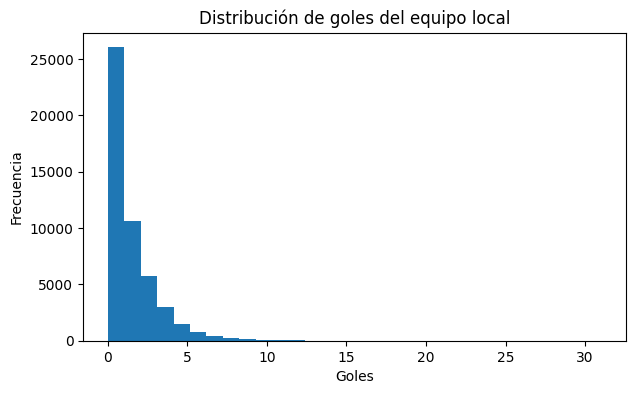

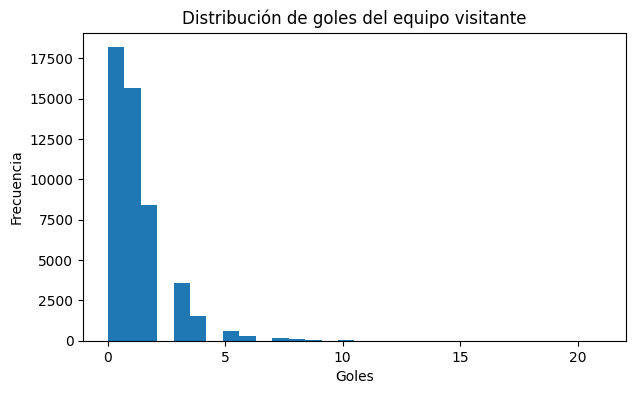

Text(0.5, 1.0, 'Boxplot de goles del equipo local')

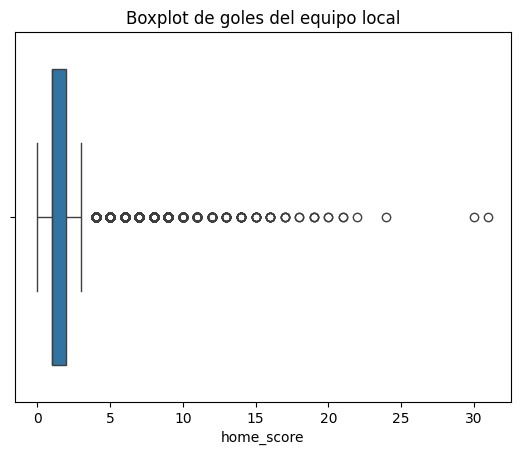

In [5]:
plt.figure(figsize=(7,4))
plt.hist(df['home_score'], bins=30)
plt.title("Distribución de goles del equipo local")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(df['away_score'], bins=30)
plt.title("Distribución de goles del equipo visitante")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")
plt.show()
sns.boxplot(x='home_score', data=df)
plt.title("Boxplot de goles del equipo local")

### Cantidad de Goles por año

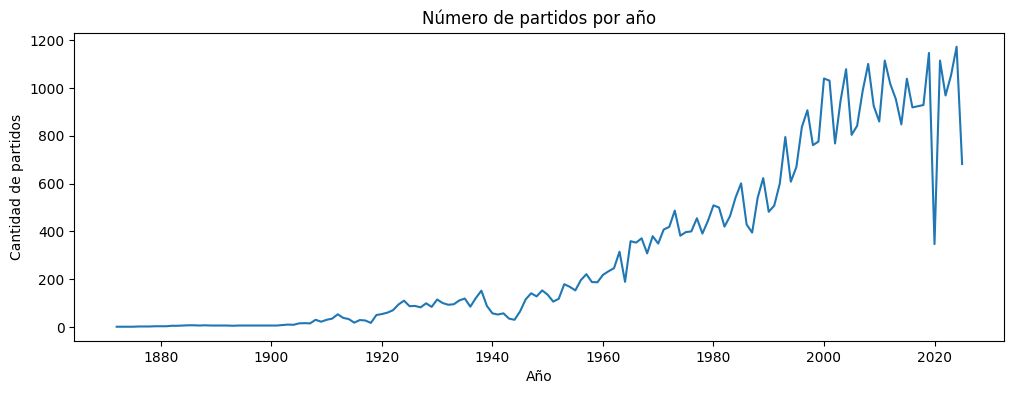

In [6]:
df['year'] = df['date'].dt.year

plt.figure(figsize=(12,4))
df['year'].value_counts().sort_index().plot(kind='line')
plt.title("Número de partidos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de partidos")
plt.show()


### Análisis Exploratorio Inicial

A partir del análisis preliminar de la base de datos pudimos identificar lo siguiente:

- El archivo contiene partidos desde el año 1872 hasta 2023 lo cual significa que teniemos una informacion extensa para el estudio
- Las columnas principales incluyen equipos, goles, ciudad, país y tipo de torneo
- Algunas columnas presentan valores nulos, principalmente en city y country, lo cual se podria esperara debido a que son datos con una gran variedad de antiguedad
- La distribución de goles muestra que la mayoría de partidos tienen entre 0 y 3 goles por equipo
- Se observa un crecimiento significativo en el número de partidos por año, reflejando la expansión del fútbol internacional
- El campo neutral requiere verificación para estandarizarlo (puede venir como booleano o string)
